In [1]:
# import libraries
import math
import random
import matplotlib.pyplot as plt

In [2]:
# generate random coordinates for 9000 stars
long = [] # array to store longitudes
lat = [] # array to store latitudes
for i in range (9000):
    # generate numbers between -pi and pi
    long.append (random.random() * (2 * math.pi) - math.pi)
    # generate numbers between -pi/2 and pi/2
    lat.append (random.random() * (math.pi) - (math.pi)/2)

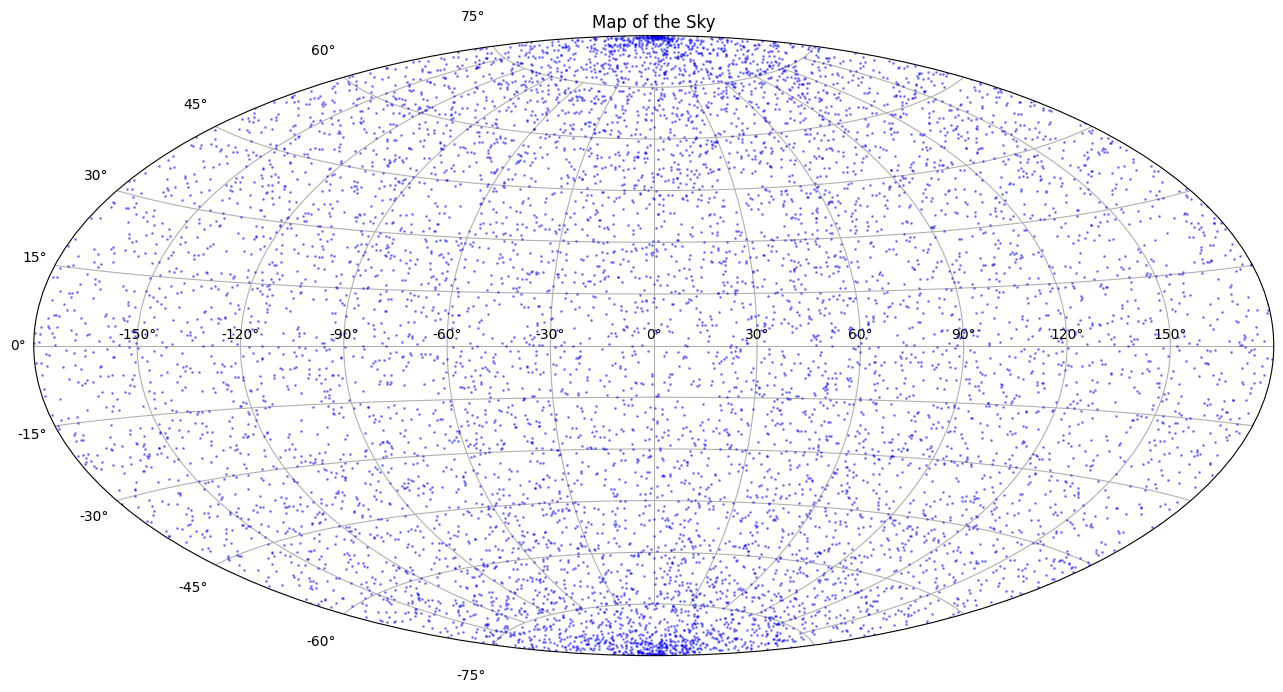

In [3]:
# create the plot
plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Map of the Sky")
plt.plot (long, lat, 'o', markersize = 1, alpha = 0.4, color = 'b')
plt.grid (True)
# plt.savefig ('sky_map.pdf')
plt.show()

#### Read Data

In [4]:
import pandas as pd
df = pd.read_csv('bsc5.csv', header=None)

In [5]:
# add column names
df.columns = ['HR',	'Name', 'DM', 'HD',	'SAO', 'FK5', 'IRflag', 'r_IRflag',	'Multiple',	'ADS', 'ADScomp', 'VarID', 'RAh1900', 'RAm1900', 'RAs1900',	'DE-1900', 'DEd1900', 'DEm1900', 'DEs1900', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs', 'GLON', 'GLAT', 'Vmag', 'n_Vmag', 'u_Vmag', 'B-V',	'u_B-V', 'U-B',	'u_U-B', 'R-I', 'n_R-I', 'SpType', 'n_SpType', 'pmRA', 'pmDE', 'n_Parallax', 'Parallax', 'RadVel', 'n_RadVel', 'l_RotVel', 'RotVel', 'u_RotVel', 'Dmag', 'Sep', 'MultID', 'MultCnt', 'NoteFlag']

#### Sanity Checks

In [6]:
df.shape

(9110, 53)

In [7]:
df.head()

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,RadVel,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag
0,1,,BD+44 4550,3,36042,,,,,46,...,-18,,,195,,4.2,21.6,AC,3,NaN
1,2,,BD-01 4525,6,128569,,,,,,...,14,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,33 Psc,BD-06 6357,28,128572,1002,I,,,,...,-6,SB1O,<,17,,2.5,0,,3,*
3,4,86 Peg,BD+12 5063,87,91701,2004,,,,,...,-2,V?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,,BD+57 2865,123,21085,,,,,61,...,-12,V,,,,0.8,1.4,,,*


In [8]:
df.tail()

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,RadVel,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag
9105,9106,,CP-73 2346,225233,255629,,,,,,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9106,9107,,BD+33 4828,225239,53622,2002,,,,,...,4,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9107,9108,,CP-72 2800,225253,255631,1001,,,,,...,-3,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9108,9109,,BD+25 5068,225276,73731,,I,,,42,...,-5,,,,,4.5,17.5,NaN,NaN,NaN
9109,9110,,BD+60 2667,225289,10962,,,,,,...,14,V,,50,,,,,,*


In [9]:
df.describe()

,HR
count,9110.00000
mean,4555.50000
std,2629.97481
min,1.00000
25%,2278.25000
50%,4555.50000
75%,6832.75000
max,9110.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9110 entries, 0 to 9109
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HR          9110 non-null   int64 
 1   Name        9110 non-null   object
 2   DM          9110 non-null   object
 3   HD          9110 non-null   object
 4   SAO         9110 non-null   object
 5   FK5         9110 non-null   object
 6   IRflag      9110 non-null   object
 7   r_IRflag    9110 non-null   object
 8   Multiple    9110 non-null   object
 9   ADS         9110 non-null   object
 10  ADScomp     9110 non-null   object
 11  VarID       9110 non-null   object
 12  RAh1900     9110 non-null   object
 13  RAm1900     9110 non-null   object
 14  RAs1900     9110 non-null   object
 15  DE-1900     9110 non-null   object
 16  DEd1900     9110 non-null   object
 17  DEm1900     9110 non-null   object
 18  DEs1900     9110 non-null   object
 19  RAh         9110 non-null   object
 20  RAm     

#### Create two columns ra and dec in the data frame having the right ascension in decimal degrees and declination in decimal degrees.

In [11]:
# convert right ascension (longitude) columns to numerical and handle missing values
df['RAh'] = pd.to_numeric(df['RAh'], errors = 'coerce')
df['RAm'] = pd.to_numeric(df['RAm'], errors = 'coerce')
df['RAs'] = pd.to_numeric(df['RAs'], errors = 'coerce')

# convert declination (latitude) columns to numerical
df['DEd'] = pd.to_numeric(df['DEd'], errors = 'coerce')
df['DEm'] = pd.to_numeric(df['DEm'], errors = 'coerce')
df['DEs'] = pd.to_numeric(df['DEs'], errors = 'coerce')

In [12]:
# create the ra column having right ascension in decimal degrees
ra_decimal_degrees = (df['RAh']) + (df['RAm'] / 60) + (df['RAs'] / 3600)
ra_decimal_degrees = ra_decimal_degrees * 15
df.insert(22, 'ra', ra_decimal_degrees)

# create the dec column having declination in decimal degrees
declination_decimal_degress = (df['DEd']) + (df['DEm'] / 60) + (df['DEs'] / 3600)
df.insert(26, 'dec', declination_decimal_degress)

In [13]:
# ensure columns were added
df[['ra', 'dec']]

,ra,dec
0,1.291250,45.229167
1,1.265833,0.503056
2,1.333750,5.707500
3,1.425000,13.396111
4,1.566667,58.436667
...,...,...
9105,1.127917,72.897778
9106,1.224167,34.659722
9107,1.172083,71.436944
9108,1.233333,26.648889


#### Create two columns long and lat that are the galactic longitude and galactic latitude. Using Astropy convert ra and dec into galactic longitude and galactic latitude.

In [14]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# calculate equitorial coordinates
equatorial = SkyCoord(ra = df['ra'] * u.degree, dec = df['dec'] * u.degree, frame='icrs')

# convert to galactic coordinates
galactic = equatorial.galactic

# extract galactic longitude and latitude
longitude = galactic.l.degree
latitude = galactic.b.degree

# insert galactic long and lat values into dataframe
df.insert(28, "long", longitude)
df.insert(29, "lat", latitude)

In [15]:
# ensure columns were added
df[['long', 'lat']]

,long,lat
0,114.444693,-16.878664
1,99.077795,-60.203182
2,102.478550,-55.322834
3,106.186519,-47.982971
4,117.034849,-3.916934
...,...,...
9105,119.447243,10.344293
9106,112.178545,-27.238331
9107,119.189265,8.905708
9108,110.218378,-35.072164


#### Assign colors to the stars according to spectral types:
* O: violet or deep blue
* B: medium blue
* A: light blue
* F: green
* G: yellow
* K: orange
* M: red
* Any other star: black

In [16]:
# assign colors to stars and add it to a new column

# initialize new column to store star colors
df['star_color'] = None

# assign colors
idx = 0
for spectral_type in df['SpType']:
    if spectral_type[2] == "O":
        color = "#191970"
    elif spectral_type[2] == "B":
        color = "#0000FF"
    elif spectral_type[2] == "A":
        color = "#ADD8E6"
    elif spectral_type[2] == "F":
        color = "#008000"
    elif spectral_type[2] == "G":
        color = "#FFFF00"
    elif spectral_type[2] == "K":
        color = "orange"
    elif spectral_type[2] == "M":
        color = "red"
    else:
        color = "black"
        
    # add star color to df
    df.at[idx, 'star_color'] = color  

    idx += 1

#### Create an all-sky map of the stars in the Yale Bright Star Catalog under Aitoff projection

##### Make an all-sky plot in equatorial coordinates for epoch 2000.0

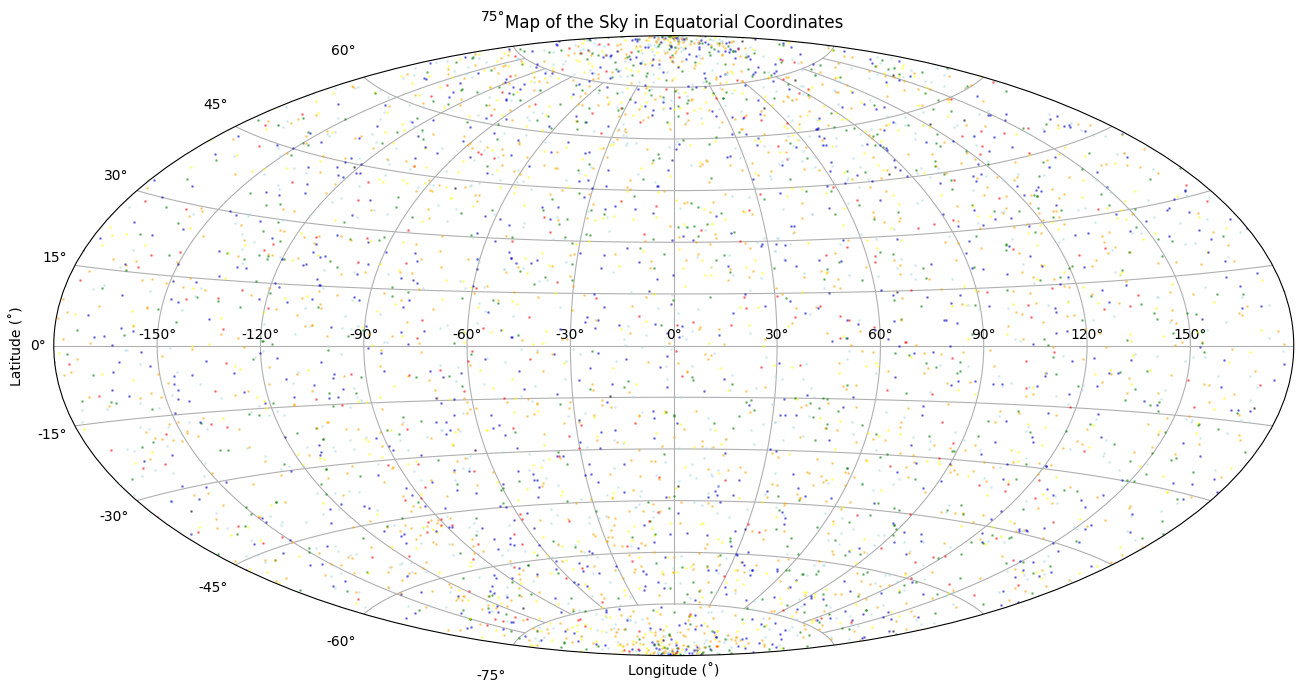

In [17]:
# create the plot
longitude = df['ra'].tolist()
latitude = df['dec'].tolist()
star_colors = df['star_color'].tolist()

plt.figure(figsize = (16, 8.4))
plt.subplot(projection = "aitoff")
for i in range(len(long)):
    plt.plot(longitude[i], latitude[i], 'o', markersize = 1, alpha = 0.4, color = star_colors[i])
plt.title("Map of the Sky in Equatorial Coordinates")
plt.xlabel("Longitude (˚)")
plt.ylabel("Latitude (˚)")
plt.grid(True)
plt.savefig('sky_map_equitorial.pdf')
plt.show()

##### Make an all-sky plot in galactic coordinates

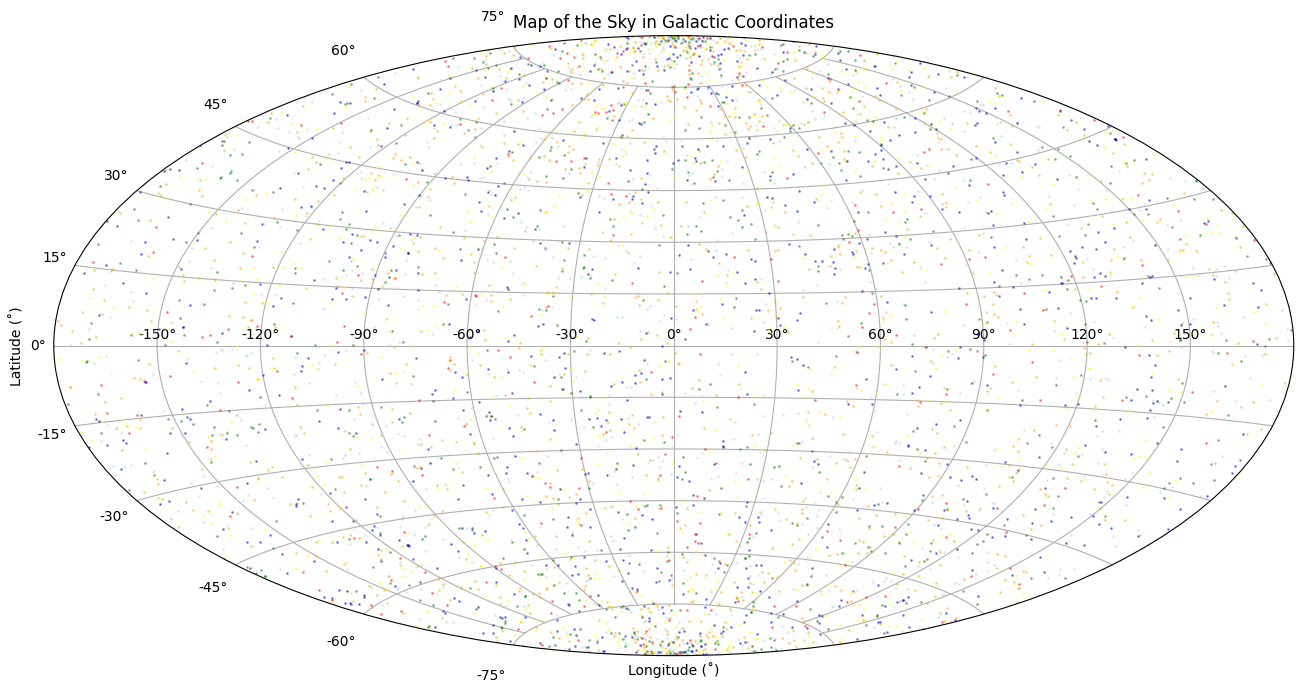

In [18]:
# create the plot
galactic_longitude = df['long'].tolist()
galactic_latitude = df['dec'].tolist()
star_colors = df['star_color'].tolist()

plt.figure(figsize = (16, 8.4))
plt.subplot(projection = "aitoff")
for i in range(len(galactic_longitude)):
    plt.plot (galactic_longitude[i], galactic_latitude[i], 'o', markersize = 1, alpha = 0.4, color = star_colors[i])
plt.title("Map of the Sky in Galactic Coordinates")
plt.xlabel("Longitude (˚)")
plt.ylabel("Latitude (˚)")
plt.grid(True)
plt.savefig('sky_map_galactic.pdf')
plt.show()

In [ ]:
# delete null values in parallax
# create distance in 
# column 'd' = 1/p